In [6]:
import lib.experimentize as E
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

from src.core import Core, Params, DATASETS, FEATURE_SELECTION_METHODS

@E.experimentize(Params)
class Experiment(Core):
    def run(self, *, method=E.param(as_func="feature_selection_{}")):
        train_x, test_x, train_y, test_y = self.train_test_split()
        selector, _ = method(train_x, train_y)
        train_x, test_x = selector(train_x), selector(test_x)

        automl = self.auto_classifier()
        automl.fit(train_x, train_y)
        features = train_x.shape[1]
        return {
            **self.get_scores(test_y, automl.predict(test_x), features),
            "Features": features
        }

def plot(results):
    sns.catplot(
        data=results.prettify(), kind="box",
        x="Features", y="Accuracy", hue="Method",
        height=5, aspect=1.5
    )
    plt.show()
    sns.catplot(
        data=results.prettify(), kind="box",
        x="Features", y="Score", hue="Method",
        height=5, aspect=1.5
    )
    plt.show()

## Artificial dataset

In [7]:
grid = [
    Params(method=method, dataset="artificial", max_features=max_features, seed=seed)
    for method in FEATURE_SELECTION_METHODS
    for max_features in [5, 10, 15, 20, 30, 40, 50]
    for seed in range(3)
]
results = Experiment().run(E.AsExperiment(grid, with_cache="cache/benchmark_artificial.pickle"))()
results

,iteration,method,dataset,max_features,seed,Accuracy,Score,Features
0,0,Random Forest,artificial,5,0,0.772302,0.772302,5
1,0,Random Forest,artificial,5,1,0.750000,0.750000,5
2,0,Random Forest,artificial,5,2,0.746596,0.746596,5
3,0,Random Forest,artificial,10,0,0.854885,0.844885,10
4,0,Random Forest,artificial,10,1,0.810000,0.800000,10
...,...,...,...,...,...,...,...,...
79,0,Chi-Squared,artificial,40,1,0.805000,0.735000,40
80,0,Chi-Squared,artificial,40,2,0.805951,0.735951,40
81,0,Chi-Squared,artificial,50,0,0.767252,0.677252,50
82,0,Chi-Squared,artificial,50,1,0.805000,0.715000,50


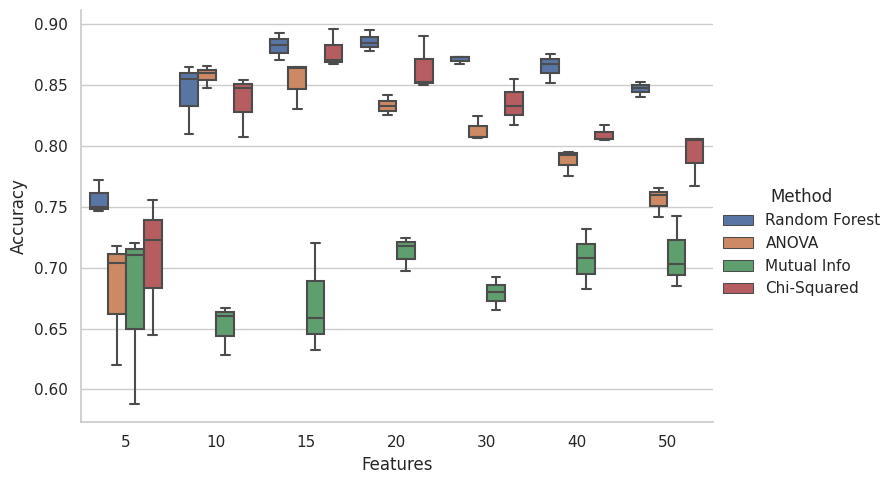

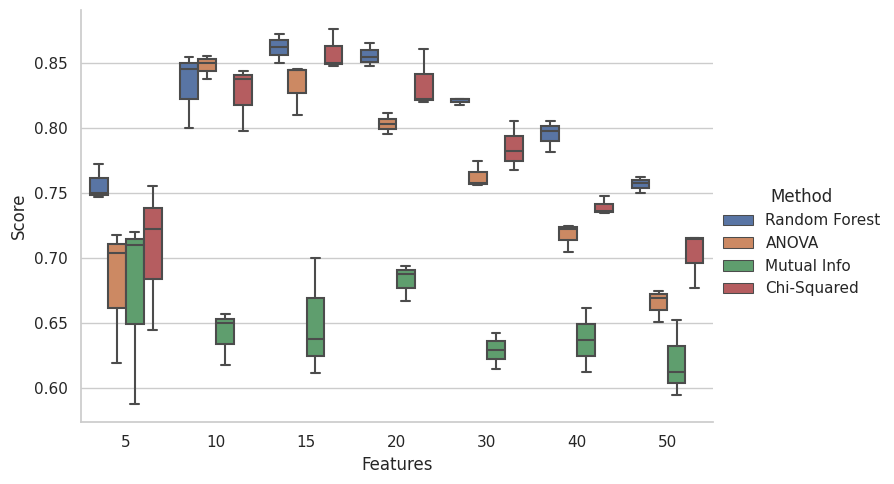

In [8]:
plot(results)

## Spam dataset

In [9]:
grid = [
    Params(method=method, dataset="spam", max_features=max_features, seed=seed)
    for method in FEATURE_SELECTION_METHODS
    for max_features in [100, 150, 200, 250, 300]
    for seed in range(3)
]
results = Experiment().run(E.AsExperiment(grid, with_cache="cache/benchmark_spam.pickle"))()
results

,iteration,method,dataset,max_features,seed,Accuracy,Score,Features
0,0,Random Forest,spam,100,0,0.872106,0.872106,100
1,0,Random Forest,spam,100,1,0.951497,0.951497,100
2,0,Random Forest,spam,100,2,0.928711,0.928711,100
3,0,Random Forest,spam,150,0,0.900000,0.895000,150
4,0,Random Forest,spam,150,1,0.966217,0.961217,150
5,0,Random Forest,spam,150,2,0.929952,0.924952,150
6,0,Random Forest,spam,200,0,0.879955,0.869955,200
7,0,Random Forest,spam,200,1,0.956193,0.946193,200
8,0,Random Forest,spam,200,2,0.935780,0.925780,200
9,0,Random Forest,spam,250,0,0.889667,0.874667,250


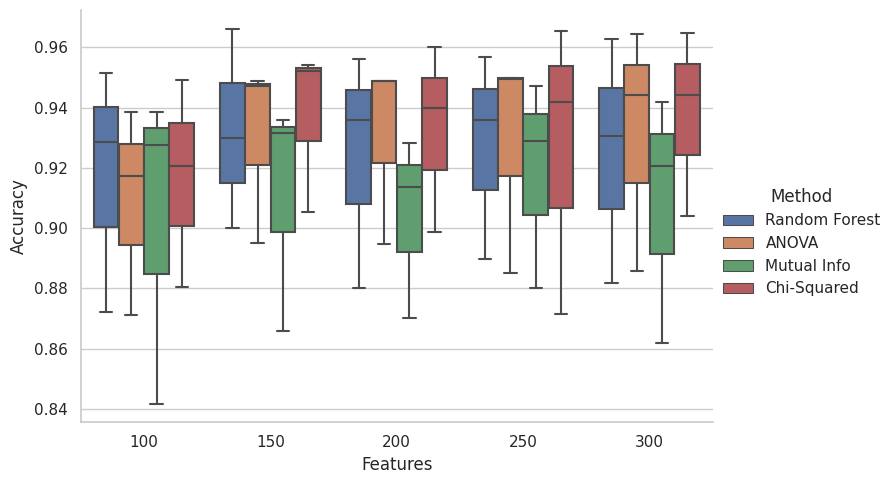

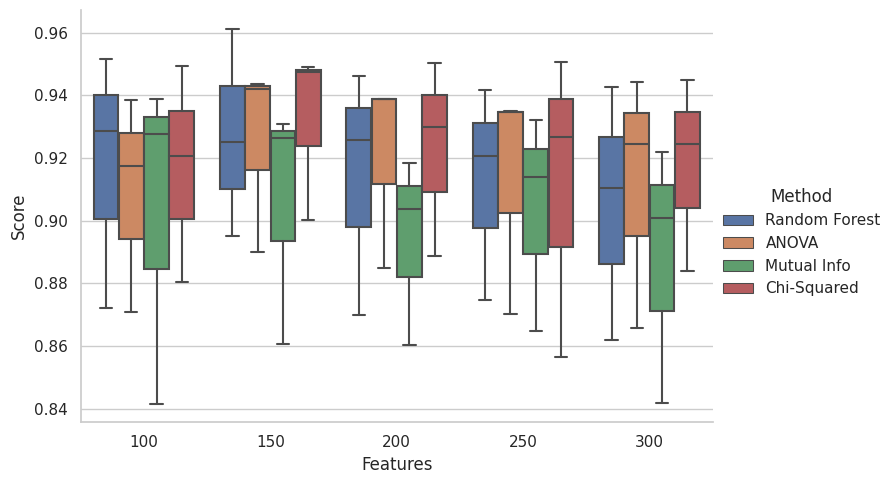

In [10]:
plot(results)